

# Operational Research Project : "OR-Gym: A Reinforcement Learning Library for Operations Research Problems" 
## Realized by : 

*  Fahmi Ayari
*  Moez Khemiri



# Introduction

 In our project, we are studying the paper "OR-Gym: A Reinforcement Learning Library for Operations Research Problems." This paper presents a comparison between heuristic and reinforcement learning (RL) methods for solving operations research (OR) problems such as the knapsack and bin packing problems.

# Reinforcement Learning 

Reinforcement learning (RL) is a type of machine learning that involves training an agent to make decisions in an environment in order to maximize a cumulative reward signal. The agent interacts with the environment by taking actions, receiving feedback in the form of rewards or punishments, and updating its policy based on the observed outcomes. RL is used in various applications, such as game playing, robotics, and control systems.

This diagram illustrates the basic components of a reinforcement learning system. The agent observes the state of the environment, takes an action, and receives a reward signal from the environment. The reward signal indicates how well the agent performed the task. Based on the received reward, the agent adjusts its policy to maximize the expected cumulative reward over time. The policy is a mapping from states to actions, and it determines the behavior of the agent in response to the observed state. Through the repeated interaction with the environment, the agent learns to take the actions that lead to the highest cumulative reward.

![](https://www.terasoft.com.tw/support/tech_articles/images/0113_191470.jpg)

In our project, we will be using RL to solve the knapsack and bin packing problems presented in the "OR-Gym" paper. We will train RL agents to learn policies for selecting items to be packed into a knapsack or a set of bins, while optimizing a certain objective function such as maximizing the value of the items packed or minimizing the number of bins used. We will compare the performance of the RL algorithms with heuristic methods, which are often used as a benchmark for solving OR problems. By analyzing the results, we will gain insights into the strengths and limitations of RL for solving OR problems and identify potential areas for further research and improvement.

<h1 style="color: yellow">Knapsack Problem</h1>


The knapsack problem is a classic optimization problem in which a set of items with given values and weights must be packed into a knapsack with a limited capacity. The goal is to maximize the total value of the packed items while respecting the weight constraint.

The picture below is an example of a one-dimensional (constraint) knapsack problem: which boxes should be chosen to maximize the amount of money while still keeping the overall weight under or equal to 15 kg

![](https://upload.wikimedia.org/wikipedia/commons/f/fd/Knapsack.svg)

Several variations of the knapsack problem have been proposed to model more complex real-world scenarios, such as uncertainty, multiple knapsacks, and different objectives. Here are some common variations:

<h1 style="color: yellow">Binary Knapsack</h1>


Each item can be either included or excluded from the knapsack. This is the most studied version of the problem.

This problem can be formulated mathematically with these 2 simple equations

Maximize:
\begin{equation}
\sum_{i=1}^{n} v_i x_i
\end{equation}

Subject to:
\begin{align}
\sum_{i=1}^{n} w_i x_i &\leq W \\
x_i &\in \{0, 1\} \quad \forall i \in \{1, \ldots, n\}
\end{align}

where:

*  $n$ is the number of items,
*  $v_i$ is the value of item $i$,
*  $w_i$ is the weight of item $i$,
*  $W$ is the maximum capacity of the knapsack,
*  $x_i$ is a binary decision variable indicating whether item $i$ is packed or not.



<h1 style="color: yellow">Bounded Knapsack</h1>


Each item has a limited number of copies that can be included in the knapsack. The goal is to maximize the total value of the packed items while respecting the weight and quantity constraints.

Maximize:
\begin{equation}
\sum_{i=1}^{n} v_i x_i
\end{equation}

Subject to:
\begin{align}
\sum_{i=1}^{n} w_i x_i &\leq W \\
x_i &\in \{0, 1, \ldots, b_i\} \quad \forall i \in \{1, \ldots, n\}
\end{align}

where:

*  $n$ is the number of items,
*  $v_i$ is the value of item $i$,
*  $w_i$ is the weight of item $i$,
*  $W$ is the maximum capacity of the knapsack,
*  $b_i$ is the maximum number of copies of item $i$ that can be packed into the knapsack,
*  $x_i$ is an integer decision variable indicating the number of copies of item $i$ that are packed into the knapsack.



<h1 style="color: yellow">Online Knapsack</h1>


The items arrive one by one, and the decision to pack an item must be made immediately without knowing the weights and values of the future items. The goal is to maximize the total value of the packed items over time while respecting the weight constraint.

<h1 style="color: blue">Heuristic Approach</h1>


For the heuristic approach , we use a simple, greedy heuristic given in Dantzig [1957], which orders the items by value/weight
ratio, and selects the next item that fits in this order. If an item does not fit - or the item
has already been selected N times - the algorithm will continue through the list until all
possibilities for packing while remaining within the weight constraint are exhausted, at which
point the algorithm will terminate. The OKP algorithm used is a greedy, online algorithm
based on the TwoBins algorithm given in Han et al. [2015]

### Code implementation

In [1]:
import random

def knapsack_randomized(items, capacity):
    n = len(items)
    value = 0
    weight = 0
    selected_items = [0] * n

    # Choose a random value of r from {0, 1} with equal probability
    r = random.randint(0, 1)

    # Sort the items by their value-to-weight ratio
    items.sort(key=lambda x: x[1] / x[0], reverse=True)

    # Loop through the items and either select or reject them
    for i in range(n):
        w = items[i][0]
        v = items[i][1]
        if r == 1:
            if w <= capacity:
                selected_items[i] = 1
                value += v
                weight += w
                capacity -= w
        else:
            if weight + w > capacity:
                selected_items[i] = 0
            else:
                selected_items[i] = 1
                value += v
                weight += w

    return value, selected_items

To test the code , we're going to be initializing a knapsack with a capacity=5, and 3 different items. And then we are going to use our implemented function to determine the optimal item combinations to put in the knapsack.

In [40]:
Items = [(random.randint(1, 12), random.randint(1, 12)) for i in range(1000)]


In [41]:
print(Items[:10])

[(11, 7), (8, 4), (10, 10), (1, 10), (6, 3), (8, 11), (2, 12), (6, 6), (8, 12), (8, 11)]


In [42]:
Knapsack_capacity=sum([Item[0] for Item in Items])/2


In [43]:
Knapsack_capacity

3249.5

In [44]:
value,selected_items=knapsack_randomized(Items,Knapsack_capacity)

In [45]:
print(f"The selected items are {selected_items}\n")
print(f"The total value of the items in the knapsack is {value}")

The selected items are [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

For a maximum capacity of 5 , the algorithm chose the items 1 and 2 , a combination which gives us a total value of 10.

<h1 style="color: blue">RL Approach</h1>


In this section, we will explore the use of Reinforcement Learning (RL) for solving the Online Knapsack Problem. Unlike the heuristic approach which relies on predefined rules to make decisions, RL uses a trial-and-error approach to learn a policy that can make optimal decisions based on the current state of the system.

We will use the OR-Gym library, a Reinforcement Learning Library for Operations Research Problems, which provides a set of RL environments for various OR problems, including the Online Knapsack Problem. We will implement RL algorithms using the OR-Gym library to solve the problem and compare their performance with the heuristic approach.

We will also compare the results with the performance of the heuristic approach to determine which approach is better suited for solving the Online Knapsack Problem.

Here we will be installing the dependancies for our code to run

In [5]:
pip install --upgrade or_gym


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [596 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib
      creating build/lib/gym
      copying gym/__init__.py -> build/lib/gym
      copying gym/version.py -> build/lib/gym
      copying gym/logger.py -> build/lib/gym
      copying gym/error.py -> build/lib/gym
      copying gym/core.py -> build/lib/gym
      creating build/lib/gym/spaces
      copying gym/spaces/space.py -> build/lib/gym/spaces
      copying gym/spaces/multi_discrete.py -> build/lib/gym/spaces
      copying gym/spaces/__init__.py -> build/lib/gym/spaces
      copying gym/spaces/discrete.py -> build/lib/gym/spaces
      copying gym/spaces/multi_binary.py -> build/lib/gym/spaces
      cop

In [6]:
pip install rl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.1/443.1 kB 7.6 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for rl: filename=rl-3.1-cp310-cp310-linux_x86_64.whl size=196693 sha256=735dba45d415ea4181847ac49444c78110dc4fe5bba4e95d93d508bf0acd1c7b
  Stored in directory: /root/.cache/pip/wheels/65/48/60/7aafc3b415ac465a5103d7a250d7460343df02a615504a8e5f
Successfully built rl
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install keras==2.3.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.8/377.8 kB 7.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires keras<2.12,>=2.11.0, but you have keras 2.3.1 which is incompatible.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow-serving-api 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install keras-rl2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
onnx 1.13.1 requires protobuf<4,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
kfp 1.8.20 requires cloudpickle<3,>=2.0.0, but you have cloudpickle 1.6.0 which is incompatible.
kfp 1.8.20 requires google-api-python-client<2,>=1.7.8, but you have google-

In [9]:
from tensorflow.keras.models import Sequential


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
import gym
import or_gym
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam
from keras.optimizers import SGD
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

### Here we will be defining an environment that is similar to the environment that we defined earlier for the heuristic approach

In [55]:
np.array(list(Item[0] for Item in Items))

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  1,  1,  2,  2,  1,  1,  2,  2,  1,  2,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  1,  2,  1,  2,  1,  2,  1,  1,  1,  2,  2,  2,  2,  2,
        2,  1,  1,  3,  2,  1,  1,  1,  1,  1,  3,  2,  3,  2,  2,  3,  2,
        3,  3,  1,  3,  3,  2,  3,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  2,  3,  3,  1,  4,  2,  1,  2,  4,  4,  4,
        3,  4,  4,  4,  3,  2,  2,  2,  3,  1,  1,  1,  2,  3,  4,  1,  3,
        2,  2,  3,  4,  4,  4,  4,  3,  3,  3,  3,  3,  3,  4,  4,  2,  4,
        4,  2,  4,  4,  2,  2,  2,  2,  2,  4,  2,  2,  4,  4,  4,  5,  5,
        5,  5,  5,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,
        5,  5,  5,  1,  6,  3,  2,  5,  3,  6,  4,  3,  1,  6,  3,  3,  6,
        3,  6,  6,  5,  3,  3,  2,  1,  4,  2,  2,  4,  4,  3,  2,  3,  1,
        4,  2,  6,  2,  1

In [56]:
env_config = {'N': len(Items),
              'max_weight': Knapsack_capacity,
              'item_weights': np.array(list(Item[0] for Item in Items)),
              'item_values': np.array(list(Item[1] for Item in Items)),
              'mask': False}
env = or_gym.make('Knapsack-v0', env_config=env_config)  
initial_state = env.reset()

In [57]:
actions = env.action_space.n
states = env.observation_space
states.shape

(2, 1001)

In [59]:
env.reset()
episode = env_config
done = False
episode=0
while not done :
    episode += 1
    print("Episode: " + str(episode))
    action = np.random.randint(actions)
    print("Take element number: " + str(action))
    next_state, reward, done, info = env.step(action)
    print("Reward: " + str(reward))
    print(next_state)
    print(env.render())
    if episode==20:
        break

Episode: 1
Take element number: 497
Reward: 5
[[   1    1    1 ...   12   12 3249]
 [  12   12   12 ...    1    1    5]]
[497] 5 5
True
Episode: 2
Take element number: 229
Reward: 10
[[   1    1    1 ...   12   12 3249]
 [  12   12   12 ...    1    1   10]]
[497, 229] 15 10
True
Episode: 3
Take element number: 934
Reward: 1
[[   1    1    1 ...   12   12 3249]
 [  12   12   12 ...    1    1   15]]
[497, 229, 934] 16 15
True
Episode: 4
Take element number: 145
Reward: 8
[[   1    1    1 ...   12   12 3249]
 [  12   12   12 ...    1    1   18]]
[497, 229, 934, 145] 24 18
True
Episode: 5
Take element number: 299
Reward: 3
[[   1    1    1 ...   12   12 3249]
 [  12   12   12 ...    1    1   20]]
[497, 229, 934, 145, 299] 27 20
True
Episode: 6
Take element number: 411
Reward: 6
[[   1    1    1 ...   12   12 3249]
 [  12   12   12 ...    1    1   25]]
[497, 229, 934, 145, 299, 411] 33 25
True
Episode: 7
Take element number: 293
Reward: 11
[[   1    1    1 ...   12   12 3249]
 [  12   12   

In [60]:
model = Sequential()  
model.add(Dense(24, activation='relu', input_shape=(1,2,len(Items)+1)))
model.add(Flatten())
model.add(Dense(actions, activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1, 2, 24)          24048     
                                                                 
 flatten_2 (Flatten)         (None, 48)                0         
                                                                 
 dense_5 (Dense)             (None, 1000)              49000     
                                                                 
Total params: 73,048
Trainable params: 73,048
Non-trainable params: 0
_________________________________________________________________


In reinforcement learning, the Q-value (or state-action value) is a measure of the expected cumulative reward that an agent will receive by taking a particular action in a particular state and following an optimal policy thereafter.

Mathematically, the Q-value of a state-action pair $(s, a)$ can be defined as:
$$Q(s, a) = \mathbb{E}_{s', a'}[R + \gamma \cdot \max_{a'} Q(s', a') |( s, a)]$$
where $s$ is the current state, $a$ is the action taken in state $s$, $s'$ is the next state, $a'$ is the action taken in the next state $s$', $R$ is the immediate reward received after taking action $a$ in state $s$, $\gamma$ is the discount factor, $Q(s', a')$ is the Q-value of the next state-action pair, and the expected value is taken over all possible next state-action pairs.


$$\pi_{\tau}(a|s) = \frac{e^{Q_{\tau}(s,a)/\tau}}{\sum_{a' \in A}e^{Q_{\tau}(s,a')/\tau}}
$$

In [61]:
policy = BoltzmannQPolicy()
memory = SequentialMemory(limit=50000, window_length=1)
dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
optimizer = SGD(lr=0.001, momentum=0.9, nesterov=True)
dqn.compile(optimizer, metrics=['mae'])
dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)

Training for 50000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 198s 20ms/step - reward: 6.6663
10 episodes - episode_reward: 6488.500 [5129.000, 6853.000] - loss: 158485622913.575 - mae: 21.587 - mean_q: 9246.459

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 198s 20ms/step - reward: 5.6580
14 episodes - episode_reward: 4123.357 [2934.000, 6532.000] - loss: 147.464 - mae: 1.019 - mean_q: 512.653

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 199s 20ms/step - reward: 4.9760
16 episodes - episode_reward: 3017.500 [2891.000, 3206.000] - loss: 231.835 - mae: 1.187 - mean_q: 596.082

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 202s 20ms/step - reward: 4.9424
17 episodes - episode_reward: 2979.059 [2757.000, 3101.000] - loss: 280.674 - mae: 1.253 - mean_q: 628.821

Interval 5 (40000 steps performed)
10000/10000 [============================

Episode 1: Total Reward = 3150
Episode 2: Total Reward = 3216
Episode 3: Total Reward = 2994
Episode 4: Total Reward = 3207
Episode 5: Total Reward = 3236
Episode 6: Total Reward = 3119
Episode 7: Total Reward = 3199
Episode 8: Total Reward = 2952


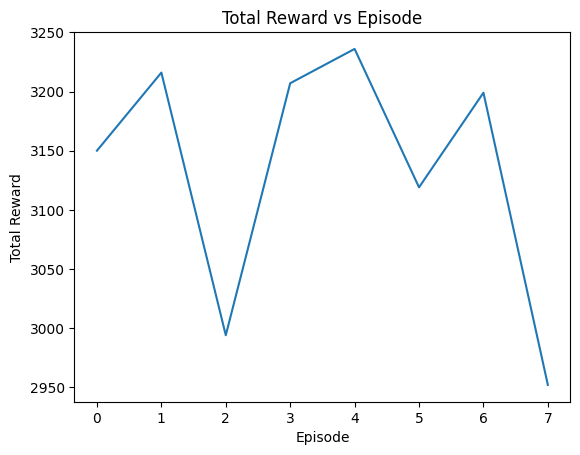

In [73]:
def train_and_plot_rewards(env, dqn, num_episodes):
    rewards = []
    for i in range(num_episodes):
        total_reward = 0
        state = env.reset()
        done = False
        while not done:
            action = dqn.forward(state)
            next_state, reward, done, info = env.step(action)
            dqn.backward(reward, terminal=done)
            state = next_state
            total_reward += reward
        rewards.append(total_reward)
        print("Episode {}: Total Reward = {}".format(i+1, total_reward))
    # Plot rewards
    plt.plot(rewards)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Total Reward vs Episode')
    plt.show()

# Train the agent and plot rewards
train_and_plot_rewards(env, dqn, num_episodes=8)

In [63]:
dqn.save_weights('my_agent_weights.h5f', overwrite=True)
dqn.load_weights('my_agent_weights.h5f')

In [71]:
print(states)

Box([[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]], [[3249 3249 3249 ... 3249 3249 3249]
 [3249 3249 3249 ... 3249 3249 3249]], (2, 1001), int32)


In [70]:
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model

agent = dqn

# Define a function to train the agent on a set of instances
def train_agent(instances, num_episodes=1000):
    rewards = []
    for i in range(num_episodes):
        total_reward = 0
        state = env.reset(instances[i % len(instances)])
        done = False
        while not done:
            action = agent.act(state)
            next_state, reward, done, info = env.step(action)
            agent.update(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward
        rewards.append(total_reward)
    return rewards

# Generate a set of instances for training


# Train the agent on the instances
rewards = train_agent(states)

# Plot the learning curve
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Learning Curve")
plt.show()

TypeError: object of type 'Box' has no len()